Unpickler is very important, and has the following functionality:
1. Load the pickle file names from a text file. The pickle file name has to contain the image also.
2. Convert each of the pickle file names into the target, original, (x0, y0, x1, y1) values
3. Load the pickle value into a np array and parse it into RGB
4. Load the corresponding image and load the adversarial scratch into it
5. Run all the models over the image with the scratch and observe different results for that particular (x,y) coords and log the results as the fraction of correct adversarial predictions.
6. Repeat step 5 with a bunch of random (x,y) coords and log the results as the fraction of correct adversarial predictions.

In [12]:
# Import the libraries required for everything we need
import pickle
from skimage.draw import line_aa
from skimage.draw import circle
from PIL import Image
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
import re

# Define helper functions here
def prep_image_for_inference(img_path, adversarial_scratch, x0,y0,x1,y1):
        input_img = load_img(img_path)
        size = len(adversarial_scratch)
        intermediate = np.array(input_img)
        rr, cc, val = line_aa(x0,y0,x1,y1)
        intermediate[rr,cc,0] = adversarial_scratch[0:int(size)/3]
        intermediate[rr,cc,1] = adversarial_scratch[int(size)/3: 2*int(size)/3]
        intermediate[rr,cc,2] = adversarial_scratch[2*int(size)/3:]
        input_img = Image.fromarray(intermediate)
        print (type(intermediate), intermediate.shape)
        input_tensor = tf_img(input_img)
        input_tensor = input_tensor.unsqueeze(0)
        input_to_model = torch.autograd.Variable(input_tensor,
                requires_grad=False)
        return input_to_model

# Define the models here
model_names = ['inceptionv3', 'resnet18', 'squeezenet1_0', 'squeezenet1_1', 'resnet50', 'vgg11_bn', 'vgg19', 'vgg16', 'resnet34', 'vgg13', 
           'densenet201', 'vgg13_bn', 'resnet152', 'vgg16_bn', 'resnet101', 
               'vgg19_bn', 'vgg11', 'alexnet']


# Step 1: Load the pickle file names from a text file. The pickle file name has to contain the image also.
images_and_best_pickles = [line.rstrip('\n') for line in open('pickles_and_images.txt')]

images = []
best_pickles = []

for line in images_and_best_pickles:
    images.append(line[0:28])
    best_pickles.append(line[28:])

all_pickle_files = os.listdir(os.getcwd() + '/pickled_image_parts_abs/')

image_and_pickled_files = dict.fromkeys(images)

best_pickle_files = []
for i in range(len(images)):
    found_pickle = [s for s in all_pickle_files if (best_pickles[i]) in s]
    image_and_pickled_files[images[i]] = found_pickle

# Step 2: Convert each of the pickle file names into the target, original, (x0, y0, x1, y1) values
for image in images:
    pickled_files = (image_and_pickled_files[image])
    for pickled_file in pickled_files:
        extracted = (re.findall('\d+', pickled_file))
        target = int(extracted[0])
        original = int(extracted[1])
        x0 = int(extracted[3])
        y0 = int(extracted[5])
        x1 = int(extracted[7])
        y1 = int(extracted[9])
        
        img_directory = '/home/malhar/Desktop/data/imagenet_validation_images/'
                
        # Step 3 and 4
        adversarial_scratch = pickle.load(open("pickled_image_parts_abs/" + pickled_file, 'rb') )
        
        size = len(adversarial_scratch)
        
        for model_name in model_names:

            print (model_name)
            
            if (model_name != 'inceptionv3'):
                if (x0 >= 223):
                    x0 = 223
                if (x1 >= 223):
                    x1 = 223
                if (y0 >= 223):
                    y0 = 223
                if (y1 >= 223):
                    y1 = 223
            rr, cc, val = line_aa(x0, y0, x1, y1)
            model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
            model.eval()

            input_to_model = prep_image_for_inference(img_directory + image, adversarial_scratch, x0,y0,x1,y1)
            
            load_img = utils.LoadImage()
            tf_img = utils.TransformImage(model)

            print ('Shape: ', input_to_model.shape)
            print ('x0: ', x0, 'y0: ', y0,  'x1: ', x1, 'y1: ', y1)
            
            print ('Target: ', target, 'Original: ', original)
            print ('Before adding the scratch: ', torch.argmax(model(input_to_model)))

            r_vector = torch.from_numpy(adversarial_scratch[0:size/3])
            r_vector = r_vector.type(torch.float)

            g_vector = torch.from_numpy(adversarial_scratch[size/3: int(2*size/3)])
            g_vector = g_vector.type(torch.float)

            b_vector = torch.from_numpy(adversarial_scratch[int(2*size/3): size])
            b_vector = b_vector.type(torch.float)

            input_to_model[0,0,rr,cc] = r_vector
            input_to_model[0,1,rr,cc] = g_vector
            input_to_model[0,2,rr,cc] = b_vector

            scratched_logits = model(input_to_model)

            print ('After adding the scratch: ', torch.argmax(scratched_logits))
        
    print ('\n')
        


inceptionv3


NameError: global name 'load_img' is not defined

In [4]:
import pickle
from skimage.draw import line_aa
from skimage.draw import circle
from PIL import Image
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

adversarial_scratch = pickle.load(open("pickled_image_parts_abs/target=2_original=460_x0_184_y0_206_x1_167_y1_43.p", 'rb') )

filename = "target=2_original=460_x0_184_y0_206_x1_167_y1_43"

filenames = [line.rstrip('\n') for line in open('log.txt')]

In [5]:
a1 = filename.split('x0_')
a2 = filename.split('y0_')

import re
str = filename
extracted = (re.findall('\d+', filename ))
target = int(extracted[0])
original = int(extracted[1])
x0 = int(extracted[3])
y0 = int(extracted[5])
x1 = int(extracted[7])
y1 = int(extracted[9])

print (target, original, x0, y0, x1, y1)
print (filename)

(2, 460, 184, 206, 167, 43)
target=2_original=460_x0_184_y0_206_x1_167_y1_43


In [7]:
img = np.copy(imread('inference/ILSVRC2012_val_00006881.jpeg'))

print (img.shape)

rr, cc, val = line_aa(166, 244, 237, 73)

R = adversarial_scratch[0:405]
G = adversarial_scratch[405:405*2]
B = adversarial_scratch[405*2:]

img[rr,cc,0] = R
img[rr,cc,1] = G
img[rr,cc,2] = B

plt.imsave('inference/ayyy.jpeg', img)

plt.figure()
plt.imshow(img)

(333, 500, 3)


ValueError: shape mismatch: value array of shape (405,) could not be broadcast to indexing result of shape (372,)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pretrainedmodels
import pretrainedmodels.utils as utils

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

for i in range(10000):
    points = np.random.randint(0,224,4)
    rr, cc,  val = line_aa(points[0], points[1], points[2], points[3])
    if (len(rr) == size/3):
        print ('\n')
        print ([points])

        rr, cc, val = line_aa(points[0], points[1], points[2], points[3])

        size = len(adversarial_scratch)


        print (len(adversarial_scratch))

        model_names = ['inceptionv3', 'resnet18', 'squeezenet1_0', 'squeezenet1_1', 'resnet50', 'vgg11_bn', 'vgg19', 'vgg16', 'resnet34', 'vgg13', 
                   'densenet201', 'vgg13_bn', 'resnet152', 'vgg16_bn', 'resnet101', 
                       'vgg19_bn', 'vgg11', 'alexnet']

        def prep_image_for_inference(img_path):
            input_img = load_img(img_path)
        #     input_tensor = data_transforms(input_img)
            input_tensor = tf_img(input_img)
            input_tensor = input_tensor.unsqueeze(0)
            input_to_model = torch.autograd.Variable(input_tensor,
                    requires_grad=False)
            return input_to_model

        for model_name in model_names:

            print (model_name)

            model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
            model.eval()

            load_img = utils.LoadImage()
            tf_img = utils.TransformImage(model)

            input_to_model = prep_image_for_inference('inference/ILSVRC2012_val_00006881.jpeg')

            print ('Before adding the scratch: ', torch.argmax(model(input_to_model)))

            r_vector = torch.from_numpy(adversarial_scratch[0:size/3])
            r_vector = r_vector.type(torch.float)

            g_vector = torch.from_numpy(adversarial_scratch[size/3: int(2*size/3)])
            g_vector = g_vector.type(torch.float)

            b_vector = torch.from_numpy(adversarial_scratch[int(2*size/3): size])
            b_vector = b_vector.type(torch.float)

            input_to_model[0,0,rr,cc] = r_vector
            input_to_model[0,1,rr,cc] = g_vector
            input_to_model[0,2,rr,cc] = b_vector

            scratched_logits = model(input_to_model)

            print ('After adding the scratch: ', torch.argmax(scratched_logits))



[array([221, 108,  15, 173])]
1302
inceptionv3
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(733))
resnet18
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(733))
squeezenet1_0
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
squeezenet1_1


/usr/local/lib/python2.7/dist-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/usr/local/lib/python2.7/dist-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(733))
resnet50
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(758))
vgg11_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(758))
vgg19
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(517))
vgg16
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(913))
resnet34
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(758))
vgg13
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(833))
densenet201


/usr/local/lib/python2.7/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(758))
vgg13_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
resnet152
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(758))
vgg16_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(758))
resnet101
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(733))
vgg19_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(913))
vgg11
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(758))
alexnet
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(733))


[array([192, 183,   5,  74])]
1302
inceptionv3
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(758))
resnet18
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tens

('After adding the scratch: ', tensor(460))
squeezenet1_1
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(733))
resnet50
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(733))
vgg11_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
vgg19
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(517))
vgg16
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(536))
resnet34
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(758))
vgg13
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
densenet201
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(733))
vgg13_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
resnet152
('Before adding the scratch: ', tensor(460))
('After adding the s

('After adding the scratch: ', tensor(460))
vgg16_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
resnet101
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
vgg19_bn
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))
vgg11
('Before adding the scratch: ', tensor(913))
('After adding the scratch: ', tensor(460))
alexnet
('Before adding the scratch: ', tensor(460))
('After adding the scratch: ', tensor(460))


In [9]:
print (size/3)

for i in range(10000):
    points = np.random.randint(0,224,4)
    rr, cc,  val = line_aa(points[0], points[1], points[2], points[3])
    if (len(rr) == size/3):
        print (points)

NameError: name 'size' is not defined

In [11]:
def image_loader(loader, image_name):
    image = Image.open(image_name)
    image = loader(image).float()
    image = torch.tensor(image, requires_grad=True)
    image = image.unsqueeze(0)
    return image

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

model_name = 'alexnet'
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model.eval()

print( np.argmax(model(image_loader(data_transforms, 'inference/ayyy.jpeg')).detach().numpy()))

977


/home/malhar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


# GENERATE IMAGES FROM THE PICKLED VALUES

In [58]:
# Import the required libraries
import pickle
from skimage.draw import line_aa
from skimage.draw import circle
from PIL import Image
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy
import pretrainedmodels
import pretrainedmodels.utils as utils
import requests

LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}
picklepath = os.getcwd() + '/pickled_image_parts_abs/target=524_original=603_x0_18_y0_174_x1_184_y1_165.p'

validation_images_path = '/home/malhar/Desktop/data/imagenet_validation_images/'

validation_image_name = 'ILSVRC2012_val_00019986.JPEG'

model_names = ['inceptionv3', 'resnet18', 'squeezenet1_0', 'squeezenet1_1', 'resnet50', 'vgg11_bn', 'vgg19', 'vgg16', 'resnet34', 'vgg13', 
           'densenet201', 'vgg13_bn', 'resnet152', 'vgg16_bn', 'resnet101', 
               'vgg19_bn', 'vgg11', 'alexnet']

load_img = utils.LoadImage()

def prep_image_for_inference(img_path):
    input_img = load_img(img_path)
    input_tensor = tf_img(input_img)
    input_tensor = input_tensor.unsqueeze(0)
    input_to_model = torch.autograd.Variable(input_tensor,
            requires_grad=False)
#     input_to_model -= torch.min(input_to_model)
#     input_to_model = input_to_model / torch.max(input_to_model)
    return input_to_model

In [68]:
model = pretrainedmodels.__dict__['inceptionv3'](num_classes=1000, pretrained='imagenet')
model.eval()
tf_img = utils.TransformImage(model)

pickleFile = open(picklepath, 'rb')
adversarial_scratch = pickle.load(pickleFile)

adversarial_scratch = (adversarial_scratch - np.min(adversarial_scratch)) / (np.max(adversarial_scratch) - np.min(adversarial_scratch))

x0 = 18
y0 = 174
x1 = 184
y1 = 165

rr, cc, val = line_aa(x0, y0, x1, y1)

In [69]:
input_to_model = prep_image_for_inference(validation_images_path + validation_image_name)

original_prediction = model(input_to_model)

size= len(adversarial_scratch)
r_vector = torch.from_numpy(adversarial_scratch[0:size/3])
r_vector = r_vector.type(torch.float)

g_vector = torch.from_numpy(adversarial_scratch[size/3: int(2*size/3)])
g_vector = g_vector.type(torch.float)

b_vector = torch.from_numpy(adversarial_scratch[int(2*size/3): size])
b_vector = b_vector.type(torch.float)

input_to_model_adv = input_to_model.clone()
input_to_model_adv[0,0,rr,cc] = r_vector
input_to_model_adv[0,1,rr,cc] = g_vector
input_to_model_adv[0,2,rr,cc] = b_vector

adversarial_prediction = model(input_to_model_adv)

In [70]:
print (torch.argmax(original_prediction), torch.argmax(adversarial_prediction))

np_input_model_adv = input_to_model_adv.detach().cpu().numpy()[0,:,:,:]
np_input_model_ben = input_to_model.detach().cpu().numpy()[0,:,:,:]

(tensor(603), tensor(603))


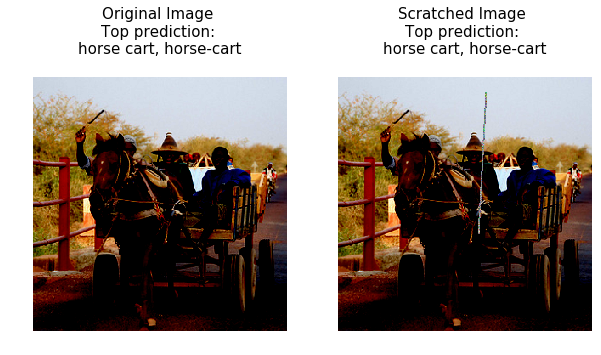

In [72]:
np_input_model_adv_reshaped = np.zeros((299,299,3))
np_input_model_adv_reshaped[:,:,0] = np_input_model_adv[0,:,:]
np_input_model_adv_reshaped[:,:,1] = np_input_model_adv[1,:,:]
np_input_model_adv_reshaped[:,:,2] = np_input_model_adv[2,:,:]

np_input_model_ben_reshaped = np.zeros((299,299,3))
np_input_model_ben_reshaped[:,:,0] = np_input_model_ben[0,:,:]
np_input_model_ben_reshaped[:,:,1] = np_input_model_ben[1,:,:]
np_input_model_ben_reshaped[:,:,2] = np_input_model_ben[2,:,:]

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
benign_title =  'Original Image \n'
benign_title += 'Top prediction: ' + '\n' + labels[603] + '\n'
plt.title(benign_title, size=15)
plt.imshow(np_input_model_ben_reshaped)
plt.axis('off')

plt.subplot(122)
benign_title =  'Scratched Image \n'
benign_title += 'Top prediction: ' + '\n' + labels[603] + '\n'
plt.title(benign_title, size=15)
plt.imshow(np_input_model_adv_reshaped)
plt.axis('off')


fig.savefig('horsecart_changed.pdf', bbox_inches='tight')

In [66]:
np.min(adversarial_scratch)

-14.186102456570497